## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how= 'inner')
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.duplicated(['Mouse ID', 'Timepoint'], keep = 'last')


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice[duplicate_mice].index.values


array([908, 910, 912, 914, 916], dtype=int64)

In [15]:
combined_data.iloc[908:918]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
#I'm not sure how to rename this when there is a space in the column name...
combined_data.rename(columns={'Mouse ID':'ID'}, inplace=True)

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data[combined_data.ID != 'g989']

In [22]:
# Checking the number of mice in the clean DataFrame.
len(combined_data['ID'].unique())

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_mean = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].mean().to_frame()
drug_median = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].median().to_frame()
drug_variance = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].var().to_frame()
drug_std = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].std().to_frame()
drug_sem = combined_data.groupby(by = 'Drug Regimen')["Tumor Volume (mm3)"].sem().to_frame()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
#Renaming the columns for better readability
drug_mean.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Mean"}, inplace=True)
drug_median.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Median"}, inplace=True)
drug_variance.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Variance"}, inplace=True)
drug_std.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Standard Deviation"}, inplace=True)
drug_sem.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume SEM"}, inplace=True)

drug_regimen_frame = drug_mean.merge(drug_median, left_index = True, right_on = 'Drug Regimen')
drug_regimen_frame = drug_regimen_frame.merge(drug_variance, left_index = True, right_on = 'Drug Regimen')
drug_regimen_frame = drug_regimen_frame.merge(drug_std, left_index = True, right_on = 'Drug Regimen')
drug_regimen_frame = drug_regimen_frame.merge(drug_sem, left_index = True, right_on = 'Drug Regimen')

drug_regimen_frame


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Running out of time

## Bar and Pie Charts

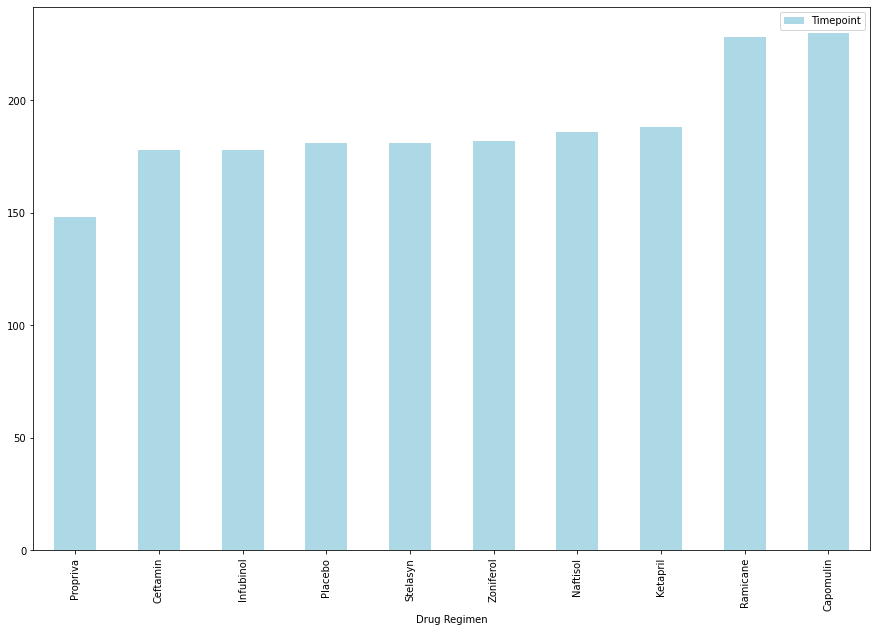

In [44]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
overtime = combined_data.groupby(by = ['Drug Regimen'])["Timepoint"].count().to_frame().sort_values(by = ['Timepoint'])

#create x axis label
xlabel = 'Drug Regiment'

#plot
overtime.plot(kind='bar', use_index = True,
             color = ['lightblue'],  figsize=(15,10))

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



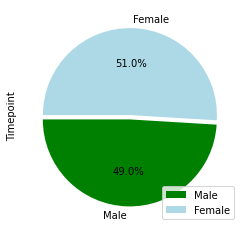

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_labels = combined_data["Sex"].unique()

#calculate gender counts
gender_data = combined_data.groupby(['Sex']).count()

# pie plot values
gender_values = [958,925]

#colors for plotting
colors = ['green', 'lightblue']

#distance of plot section break
explode = (0.05, 0)



gender_data.plot(kind = 'pie', y = "Timepoint", explode=explode, labels = pie_labels, colors = colors, 
    autopct="%1.1f%%", startangle=180)
plt.legend(loc='lower right')

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Running out of time


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
